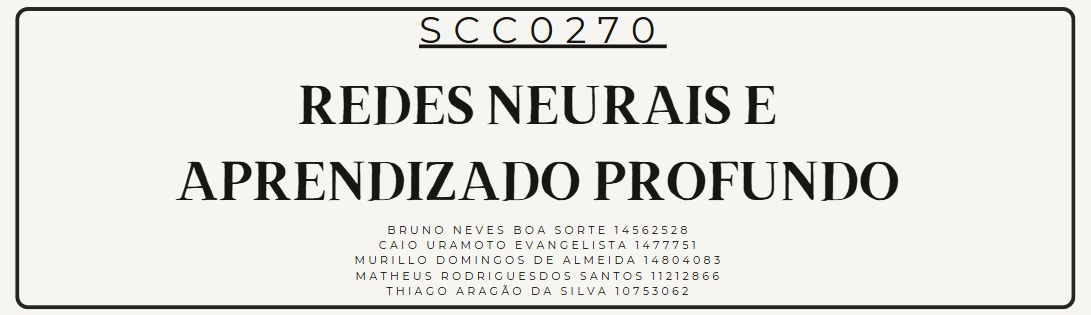

## Introdução

---

### Projeto Multimodal de Redes Neurais para Detecção e Análise de Tumores Cerebrais (CT + MRI)

---

## Descrição Geral

Este projeto tem como objetivo o desenvolvimento de um modelo de **aprendizado profundo multimodal**, utilizando imagens de **Tomografia Computadorizada (CT)** e **Ressonância Magnética (MRI)** para **detecção, classificação e análise de tumores cerebrais**.

O uso de múltiplas modalidades de imagem permite ao modelo combinar informações complementares:

* **CT:** Estruturas ósseas e calcificações.
* **MRI:** Detalhes de tecidos moles.

Essa abordagem busca auxiliar no **diagnóstico precoce**, na **classificação de tipos de tumores** e como suporte a decisões clínicas.

---

## Sobre o Conjunto de Dados

O dataset foi construído a partir de diferentes fontes públicas e privadas.

* **Modalidades:** CT e MRI.
* **Tipos de Tumores:** Glioma, Meningioma, Pituitário, entre outros.
* **Tamanhos das Imagens:** Diversos (256x256, 512x512).
* **Anotações:** Tipo de tumor, localização (em alguns casos), modalidade da imagem.

---

## Fontes do Conjunto de Dados

### Imagens de Tomografia Computadorizada (CT):

* [CT Brain Segmentation - Roboflow](https://universe.roboflow.com/joshua-zgc7b/ct-brain-segmentation)
* [CT to MRI cGAN - Kaggle](https://www.kaggle.com/datasets/darren2020/ct-to-mri-cgan)
* [CT Head Scans - Kaggle](https://www.kaggle.com/datasets/clarksaben/ct-head-scans)
* [Head CT Images for Classification - Kaggle](https://www.kaggle.com/datasets/nipaanjum/head-ct-images-for-classification)
* Dados privados (Cérebro Anônimo)
* [CT e MRI não pareados - Mendeley Data](https://data.mendeley.com/datasets/z4wc364g79/1)

### Imagens de Ressonância Magnética (MRI):

* [Brain Tumor MRI Scans - Kaggle](https://www.kaggle.com/datasets/rm1000/brain-tumor-mri-scans)
* [Brain Tumor MRIs - Kaggle](https://www.kaggle.com/datasets/vinayjayanti/brain-tumor-mris)
* [Siardataset - Kaggle](https://www.kaggle.com/datasets/masoumehsiar/siardataset)
* [Brain Tumors 256x256 - Kaggle](https://www.kaggle.com/datasets/thomasdubail/brain-tumors-256x256)
* [MRI Image Classification - Kaggle](https://www.kaggle.com/datasets/iashiqul/brain-tumor-mri-image-classification-dataset)
* [Brain Tumor MRI Yes or No - Kaggle](https://www.kaggle.com/datasets/mohamada2274/brain-tumor-mri-yes-or-no)
* [Brain Tumor Class Class - Roboflow](https://universe.roboflow.com/college-sf5ih/brain-tumor-class-class)
* [Brain Tumor Detection - Roboflow](https://universe.roboflow.com/tuan-nur-afrina-zahira/brain-tumor-detection-bmmqz)
* [Tumor Detection - Roboflow](https://universe.roboflow.com/brain-tumor-detection-wsera/tumor-detection-ko5jp)

---

## Objetivos do Projeto

* Classificação de Tumores
* Segmentação de Áreas Tumorais
* Detecção Binária (Tumor / Sem Tumor)
* Fusão de Modalidades (CT + MRI)
* Tradução entre Modalidades (ex.: geração de MRI a partir de CT)

---

## Importância Clínica e Científica

* Diagnóstico precoce
* Apoio à decisão clínica
* Pesquisa em fusão multimodal de imagens médicas
* Desenvolvimento de sistemas CAD (Computer-Aided Diagnosis)

---

## Modelos

### Classificação

* CNNs (ResNet, VGG, EfficientNet)

### Segmentação

...

### Tradução entre Modalidades / Geração de Imagens

...

---

## Estratégias de Fusão Multimodal

| Estratégia      | Descrição                                             |
| --------------- | ----------------------------------------------------- |
| Early Fusion    | CT e MRI como múltiplos canais na entrada             |
| Late Fusion     | Processamento separado + fusão posterior das features |
| Cross-Attention | Mecanismo de atenção cruzada entre as features        |

---

## Métricas de Avaliação

### Para Classificação:

* Accuracy
* Precision / Recall / F1-score
* AUC-ROC

### Para Segmentação:

* Dice Coefficient
* IoU (Intersection over Union)
* Hausdorff Distance

---

## Possíveis Aplicações

* Ferramentas clínicas com IA
* Suporte à radiologia e neurocirurgia
* Pesquisa em aprendizado multimodal
* Sistemas hospitalares de diagnóstico

---

## Referências Científicas

* Isensee, F. et al. (2021). nnU-Net: A self-configuring method for deep learning-based biomedical image segmentation. *Nature Methods*.
* Zhou, Z. et al. (2018). UNet++: A Nested U-Net Architecture for Medical Image Segmentation. *Springer*.
* Zhou, T., Ruan, S., Canu, S. (2019). Deep Learning for Medical Image Segmentation Using Multi-Modality Fusion. *Array*.
* Ronneberger, O. et al. (2015). U-Net: Convolutional Networks for Biomedical Image Segmentation. *MICCAI*.

---


##EDA

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("murtozalikhon/brain-tumor-multimodal-image-ct-and-mri")

print("Path to dataset files:", path)

100%|██████████| 361M/361M [00:09<00:00, 38.6MB/s]


Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/murtozalikhon/brain-tumor-multimodal-image-ct-and-mri/versions/1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from PIL import Image
import os
import matplotlib.pyplot as plt
from collections import Counter
import torch.optim as optim
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score, accuracy_score
import time
from IPython.display import display, clear_output


Nesta etapa, estamos preparando o pipeline de carregamento de dados para as imagens de ressonância magnética (MRI) do nosso dataset. O código realiza:

Detecção automática de dispositivo (CPU ou GPU)

Transformação das imagens (redimensionamento + conversão para tensor)

Leitura das imagens a partir da estrutura de pastas

Divisão em treino e teste (80/20)

Criação dos dataloaders com shuffle e batching

In [ ]:
# Verificando se há GPU disponível, caso contrário, utiliza CPU
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

# Definindo as transformações a serem aplicadas às imagens
# Aqui estamos redimensionando as imagens para 224x224 pixels
# e convertendo cada uma para tensor (necessário para o PyTorch)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Carregando o dataset MRI a partir da estrutura de pastas
# O ImageFolder assume que cada subpasta representa uma classe
MRI = datasets.ImageFolder(root=path + '/Dataset/Brain Tumor MRI images', transform=transform)

# Criando o DataLoader para o dataset completo (não dividido ainda)
# Aqui apenas para exemplo inicial de acesso aos dados
MRI_dataloader = DataLoader(MRI, batch_size=32, shuffle=True)

# Definindo o tamanho do conjunto de treino (80% do total)
MRI_train_size = int(0.8 * len(MRI))
# O restante será o conjunto de teste (20%)
MRI_test_size = len(MRI) - MRI_train_size

# Dividindo o dataset original em treino e teste
# De forma randômica, mas sem seed (pode gerar splits diferentes em cada execução)
MRI_train_dataset, MRI_test_dataset = random_split(MRI, [MRI_train_size, MRI_test_size])

# Criando o DataLoader específico para o conjunto de treino
MRI_train_loader = DataLoader(MRI_train_dataset, batch_size=32, shuffle=True)

# Criando o DataLoader específico para o conjunto de teste
MRI_test_loader = DataLoader(MRI_test_dataset, batch_size=32, shuffle=True)

# Exibindo o número de amostras em cada conjunto
print("MRI Training set size:", len(MRI_train_dataset))
print("MRI Testing set size:", len(MRI_test_dataset))

# Exibindo os nomes das classes disponíveis no dataset (ex: 'Glioma', 'Meningioma', etc.)
print("MRI Classes:", MRI.classes)


MRI Training set size: 4000
MRI Testing set size: 1000
MRI Classes: ['Healthy', 'Tumor']


Nesta etapa, estamos realizando a Análise Exploratória de Dados (EDA) focada na distribuição das classes no dataset de MRI.

O objetivo é verificar se o conjunto de dados está balanceado entre os diferentes tipos de tumores cerebrais (exemplo: Glioma, Meningioma, etc).

Essa visualização ajuda a entender possíveis desbalanceamentos, o que é importante para definir estratégias futuras como balanceamento, oversampling ou uso de métricas ponderadas.

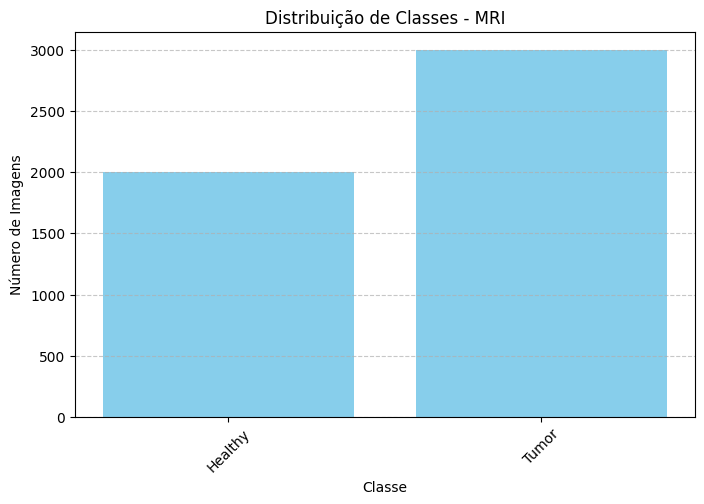

In [ ]:

# Criando uma lista com os índices de classe de cada imagem no dataset
# Exemplo: [0, 0, 1, 2, 1, ...] representando os rótulos numéricos
labels = [sample[1] for sample in MRI.samples]

# Contando quantas imagens existem por classe (baseado no índice da classe)
class_counts = Counter(labels)

# Pegando os nomes reais das classes a partir do atributo 'classes' do ImageFolder
class_names = MRI.classes

# Criando um dicionário mapeando o nome da classe para a quantidade de imagens
# Exemplo: {'Glioma': 1200, 'Meningioma': 1500, ...}
class_counts_named = {class_names[idx]: count for idx, count in class_counts.items()}

# Criando o gráfico de barras para visualizar a distribuição das classes
plt.figure(figsize=(8,5))
plt.bar(class_counts_named.keys(), class_counts_named.values(), color='skyblue')

# Configurando os títulos e rótulos do gráfico
plt.title('Distribuição de Classes - MRI')
plt.xlabel('Classe')
plt.ylabel('Número de Imagens')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibindo o gráfico
plt.show()


Nesta etapa do EDA, estamos visualizando amostras aleatórias do dataset de MRI, com suas respectivas classes (tipos de tumor).

O objetivo é ter uma visão rápida da qualidade visual das imagens, verificar variações entre as classes e identificar possíveis ruídos ou inconsistências nos dados.

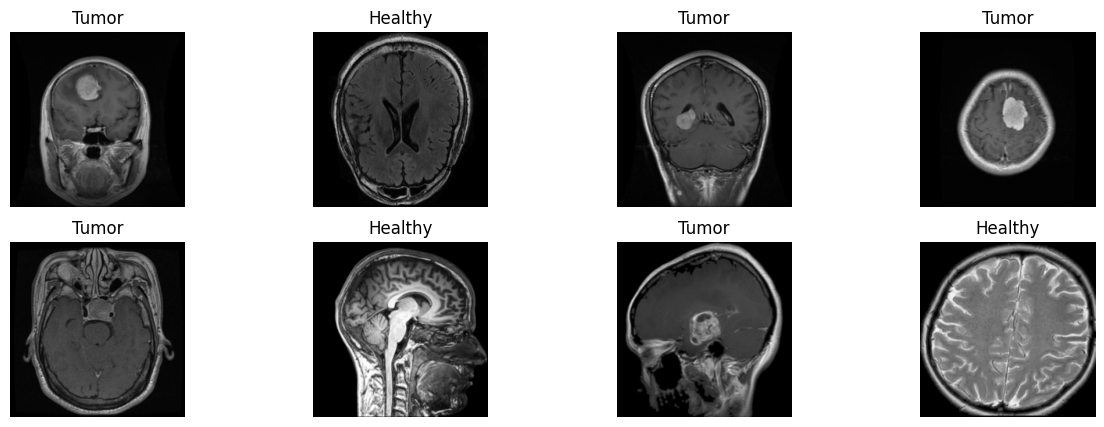

In [ ]:

# Função para exibir imagens aleatórias do dataset
def show_random_images(dataset, class_names, num_images=8):
    plt.figure(figsize=(15, 5))  # Define o tamanho da figura (largura x altura)

    # Seleciona índices aleatórios, sem repetição, dentro do tamanho do dataset
    indices = np.random.choice(len(dataset), num_images, replace=False)

    # Loop para plotar cada imagem selecionada
    for i, idx in enumerate(indices):
        # Obtendo a imagem e o label correspondente
        image, label = dataset[idx]

        # Convertendo o tensor de formato [C, H, W] para [H, W, C] (necessário para o matplotlib)
        image = image.permute(1, 2, 0)

        # Criando os subplots (ex.: 2 linhas por (num_images/2) colunas)
        plt.subplot(2, num_images//2, i+1)

        # Exibindo a imagem
        plt.imshow(image, cmap='gray')  # Para MRI, geralmente faz sentido mostrar como imagem em tons de cinza

        # Colocando o nome da classe como título da imagem
        plt.title(class_names[label])

        # Removendo os eixos para visualização mais limpa
        plt.axis('off')

# Chamando a função para mostrar 8 imagens aleatórias do MRI dataset
show_random_images(MRI, MRI.classes, num_images=8)


Nesta etapa, estamos analisando o tamanho original das imagens (antes do resize aplicado nas transformações do DataLoader).

O objetivo é entender se existe grande variação de resolução entre as imagens de diferentes classes, o que pode influenciar na escolha de técnicas de pré-processamento (como resize, padding ou cropping)

In [ ]:

# Loop sobre cada classe disponível no dataset MRI
for class_folder in MRI.classes:
    # Monta o caminho completo da pasta
    class_path = os.path.join(path, 'Dataset/Brain Tumor MRI images', class_folder)

    # Pega o nome do primeiro arquivo de imagem dentro da pasta da classe
    example_image_path = os.listdir(class_path)[0]

    # Abre a imagem usando PIL
    img = Image.open(os.path.join(class_path, example_image_path))

    # Exibe o nome da classe e o tamanho original da imagem (largura x altura)
    print(f"Classe: {class_folder}, Tamanho original: {img.size}")


Classe: Healthy, Tamanho original: (227, 222)
Classe: Tumor, Tamanho original: (512, 512)


Nesta etapa, estamos calculando as estatísticas básicas dos pixels das imagens de treino (MRI), após o transform (resize + ToTensor).

O foco é obter a média (mean) e o desvio padrão (std) por canal, que são informações fundamentais caso você queira aplicar normalização (Normalization) nos próximos passos do pipeline de deep learning.

Esse tipo de normalização ajuda o modelo a convergir mais rápido e evita problemas de escala entre as entradas.

In [ ]:


# Função para calcular a média e o desvio padrão dos pixels de todo o dataset
def get_dataset_stats(dataset):
    # Carregando o dataset em batches de 32 imagens
    loader = DataLoader(dataset, batch_size=32, shuffle=False)

    # Acumulador para a média
    mean = 0.0
    # Acumulador para o desvio padrão
    std = 0.0
    # Contador de imagens processadas
    total_images = 0

    # Loop sobre o DataLoader
    for images, _ in loader:
        # Número de imagens no batch atual
        batch_samples = images.size(0)

        # Reestruturando o tensor para formato: [batch, channels, pixels]
        images = images.view(batch_samples, images.size(1), -1)

        # Somando a média dos pixels de cada canal
        mean += images.mean(2).sum(0)

        # Somando o desvio padrão dos pixels de cada canal
        std += images.std(2).sum(0)

        # Atualizando o total de imagens processadas
        total_images += batch_samples

    # Calculando a média final por canal
    mean /= total_images

    # Calculando o desvio padrão final por canal
    std /= total_images

    return mean, std

# Calculando as estatísticas no dataset de treino (MRI)
mean, std = get_dataset_stats(MRI_train_dataset)

# Exibindo o resultado
print(f"Mean: {mean}")
print(f"Std: {std}")


Mean: tensor([0.1893, 0.1893, 0.1893])
Std: tensor([0.1823, 0.1823, 0.1823])


Nesta etapa, estamos criando uma visualização que mostra múltiplas imagens para cada classe (tipo de tumor) do dataset MRI.

O objetivo é ter uma visão comparativa de como as imagens de diferentes classes se apresentam, identificando padrões visuais, diferenças entre classes e potenciais problemas de consistência no dataset.

Aqui, o código gera um grid organizado por classe, com um número configurável de amostras por classe

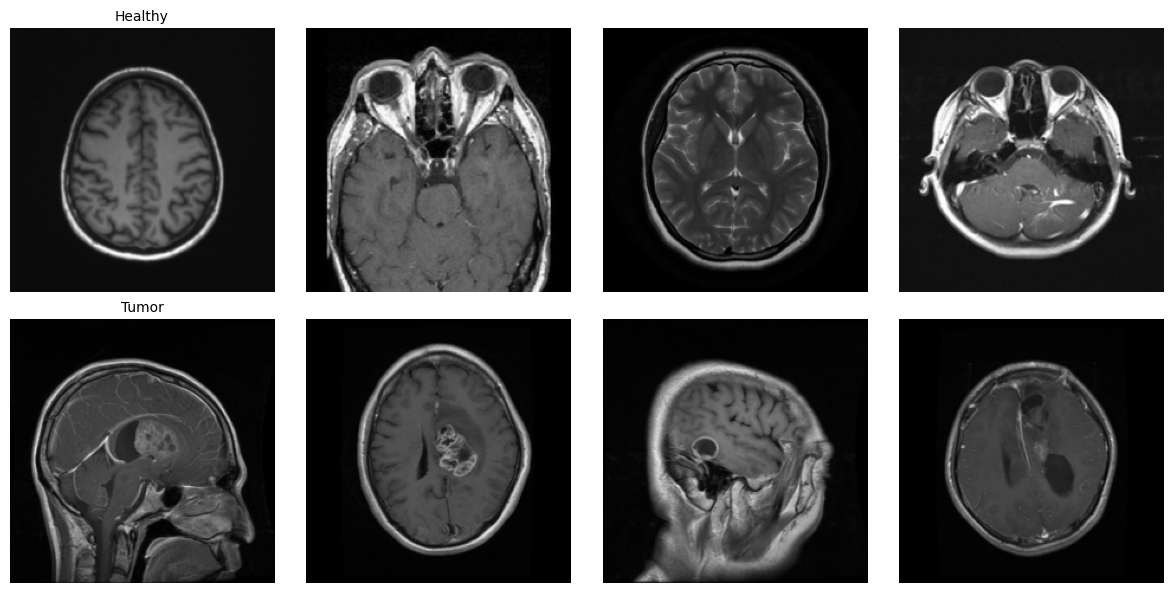

In [ ]:
import matplotlib.pyplot as plt

# Função para mostrar múltiplas imagens de cada classe
def show_images_per_class(dataset, class_names, samples_per_class=4):
    # Cria uma grade (grid) de subplots com tamanho proporcional ao número de classes e imagens por classe
    fig, axes = plt.subplots(len(class_names), samples_per_class, figsize=(samples_per_class*3, len(class_names)*3))

    # Loop sobre cada classe (exemplo: Glioma, Meningioma, etc.)
    for class_idx, class_name in enumerate(class_names):
        images_shown = 0  # Contador de imagens mostradas para a classe atual

        # Loop sobre todo o dataset procurando imagens daquela classe
        for image, label in dataset:
            if label == class_idx:
                # Seleciona o subplot correspondente
                ax = axes[class_idx, images_shown]

                # Exibe a imagem (convertendo o tensor para formato correto para o matplotlib)
                ax.imshow(image.permute(1, 2, 0), cmap='gray')
                ax.axis('off' )  # Remove os eixos para melhor visualização

                # Adiciona o nome da classe apenas na primeira imagem da linha
                if images_shown == 0:
                    ax.set_title(f'{class_name}', fontsize=10)

                images_shown += 1

                # Limita o número de imagens por classe (exemplo: 4)
                if images_shown == samples_per_class:
                    break

    # Ajusta o layout para evitar sobreposição
    plt.tight_layout()

    # Exibe o grid
    plt.show()

# Chamando a função para mostrar 4 imagens de cada classe
show_images_per_class(MRI, MRI.classes, samples_per_class=4)


# Modelos

In [ ]:
class ResNetModel(nn.Module):
  def __init__ (self, num_classes_multi=4):
    super(ResNetModel, self).__init__()

    # Encoder
    self.encoder_resnet = models.resnet34(weights=models.ResNet34_Weights.IMAGENET1K_V1)
    # Removemos as camadas finais de pooling e classificação do ResNet
    self.encoder_resnet = nn.Sequential(*(list(self.encoder_resnet.children())[:-2]))

    # O output do encoder ResNet34 terá 512 canais
    encoder_output_channels = 512

    # Decoder de Segmentação (Estilo U-net)
    # CORREÇÃO 1: Corrigido "ConvTransposed" para "ConvTranspose2d"
    self.upsample1 = nn.Sequential(
        nn.ConvTranspose2d(encoder_output_channels, 256, kernel_size=2, stride=2), nn.ReLU(),
        nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.ReLU(),
    )
    # CORREÇÃO 1 e 2: Corrigido "ConvTransposed" e ajustada a dimensão de entrada
    self.upsample2 = nn.Sequential(
        nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2), nn.ReLU(),
        nn.Conv2d(128, 128, kernel_size=3, padding=1), nn.ReLU(),
    )
    # CORREÇÃO 1: Corrigido "ConvTransposed"
    self.upsample3 = nn.Sequential(
        nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2), nn.ReLU(),
        nn.Conv2d(64, 64, kernel_size=3, padding=1), nn.ReLU(),
    )
    self.final_seg_conv = nn.Conv2d(64, 1, kernel_size=1)

    # Cabeçalho de Classificação Binária
    # CORREÇÃO 3: Usada a variável correta para o número de features (512)
    self.binary_classifier = nn.Sequential(
        # ENTRADA: 512 features
        nn.Linear(encoder_output_channels, 256),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(256, 1)
    )

    # Cabeçalho de Classificação Multiclasse
    # CORREÇÃO 3: Usada a variável correta para o número de features (512)
    self.multi_class_classifier = nn.Sequential(
        # ENTRADA: 512 features
        nn.Linear(encoder_output_channels, 256),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(256, num_classes_multi)
    )

  def forward(self, image_mri):
      # Encoder
      # CORREÇÃO 4: Usado o nome correto do atributo do encoder
      # Saída com 512 canais
      features_mri = self.encoder_resnet(image_mri)

      # Caminho da Segmentação
      x_seg = self.upsample1(features_mri)
      x_seg = self.upsample2(x_seg)
      x_seg = self.upsample3(x_seg)
      x_seg = F.interpolate(x_seg, size=(224, 224), mode='bilinear', align_corners=False)
      output_seg = self.final_seg_conv(x_seg)

      # Caminho da Classificação
      pooled_features = F.adaptive_avg_pool2d(features_mri, (1, 1)).view(features_mri.size(0), -1)

      # Cabeçalhos de Classificação
      output_binary = self.binary_classifier(pooled_features)
      output_multi = self.multi_class_classifier(pooled_features)

      return {
          "segmentation_mask": output_seg,
          "binary_classification": output_binary,
          "multi_class_classification": output_multi
      }

In [ ]:
class EfficientNetModel(nn.Module):
  def __init__(self, num_classes_multi=4):
    super(EfficientNetModel, self).__init__()

    # Encoder
    #Carregamos o modelo base pré-treinado
    base_model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)

    #Usamos apenas o extrator de features do EfficientNet
    self.encoder = base_model.features

    # O número de canais de saída do encoder EfficientNet-B0 é 1280
    encoder_output_channels = 1280

    # Decoder de Segmentação (Estilo U-Net)
    # As camadas são ajustadas para a entrada de 1280 canais do encoder
    self.upsample1 = nn.Sequential(
        nn.ConvTranspose2d(encoder_output_channels, 512, kernel_size=2, stride=2), nn.ReLU(),
        nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU()
    )
    self.upsample2 = nn.Sequential(
        nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2), nn.ReLU(),
        nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.ReLU()
    )
    self.upsample3 = nn.Sequential(
        nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2), nn.ReLU(),
        nn.Conv2d(128, 128, kernel_size=3, padding=1), nn.ReLU()
    )
    self.upsample4 = nn.Sequential(
        nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2), nn.ReLU(),
        nn.Conv2d(64, 64, kernel_size=3, padding=1), nn.ReLU()
    )
    # A camada final de segmentação continua com 1 canal de saída
    self.final_seg_conv = nn.Conv2d(64, 1, kernel_size=1)

    # Cabeçalho de Classificação Binária
    # AJUSTE: A camada linear de entrada agora espera um vetor de tamanho 1280
    self.binary_classifier = nn.Sequential(
        # ENTRADA: 1280 features
        nn.Linear(encoder_output_channels, 512),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(512, 1)
    )

    # Cabeçalho de Classificação Multiclasse
    # AJUSTE: A camada linear de entrada agora espera um vetor de tamanho 1280
    self.multi_class_classifier = nn.Sequential(
        # ENTRADA: 1280 features
        nn.Linear(encoder_output_channels, 512),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(512, num_classes_multi)
    )

  def forward(self, image):
    # Encoder
    # Entrada: [batch, 3, 224, 224] -> Saída: [batch, 1280, 7, 7]
    features = self.encoder(image)

    # Caminho da Segmentação
    x_seg = self.upsample1(features)
    x_seg = self.upsample2(x_seg)
    x_seg = self.upsample3(x_seg)
    x_seg = self.upsample4(x_seg)
    # Garante que o tamanho da máscara de saída seja 224x224
    x_seg = F.interpolate(x_seg, size=(224, 224), mode='bilinear', align_corners=False)
    output_seg = self.final_seg_conv(x_seg)

    # Caminho da Classificação
    # Aplica pooling para transformar o mapa de features em um vetor
    # [batch, 1280, 7, 7] -> [batch, 1280]
    pooled_features = F.adaptive_avg_pool2d(features, (1, 1)).view(features.size(0), -1)

    # Cabeçalhos de Classificação
    output_binary = self.binary_classifier(pooled_features)
    output_multi = self.multi_class_classifier(pooled_features)

    return {
        "segmentation_mask": output_seg,
        "binary_classification": output_binary,
        "multi_class_classification": output_multi
    }


# Treinamento

In [ ]:

# FUNÇÃO DE PLOTAGEM EM TEMPO REAL
def live_plot(history, epoch, num_epochs, model_name):
  """
  Função para limpar a saída e desenhar o gráfico de perda e acurácia.
  """
  # Limpa a saída da célula atual
  clear_output(wait=True)

  # Prepara os dados do eixo X (épocas)
  epochs_so_far = range(1, len(history['train_loss']) + 1)

  # Cria a figura e os eixos
  plt.style.use('seaborn-v0_8-whitegrid')
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
  fig.suptitle(f'Treinando {model_name} - Época {epoch}/{num_epochs}', fontsize=20, y=1.03)

  # --- Gráfico de Acurácia ---
  ax1.plot(epochs_so_far, history['train_acc'], 'bo-', label='Acurácia de Treino')
  ax1.plot(epochs_so_far, history['test_acc'], 'ro-', label='Acurácia de Validação')
  ax1.set_title('Acurácia por Época', fontsize=16)
  ax1.set_xlabel('Épocas', fontsize=12)
  ax1.set_ylabel('Acurácia', fontsize=12)
  ax1.legend()
  # Define os limites do eixo Y para acurácia para melhor visualização
  ax1.set_ylim(0, 1.05)
  # Garante ticks inteiros para épocas
  ax1.set_xticks(np.arange(1, num_epochs + 1, 1))

  # --- Gráfico de Perda (Loss) ---
  ax2.plot(epochs_so_far, history['train_loss'], 'bo-', label='Perda de Treino')
  ax2.plot(epochs_so_far, history['test_loss'], 'ro-', label='Perda de Validação')
  ax2.set_title('Perda (Loss) por Época', fontsize=16)
  ax2.set_xlabel('Épocas', fontsize=12)
  ax2.set_ylabel('Perda', fontsize=12)
  ax2.legend()
  # Garante ticks inteiros para épocas
  ax2.set_xticks(np.arange(1, num_epochs + 1, 1))

  # Mostra o gráfico
  plt.show()


In [ ]:
# FUNÇÃO DE EXPERIMENTO
def run_experiment_with_live_plot(model, model_name, train_loader, test_loader, device):
  print(f"--- Iniciando experimento para: {model_name} ---")

  model.to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=1e-4)
  num_epochs = 3

  history = {
      "train_loss": [], "train_acc": [],
      "test_loss": [], "test_acc": []
  }

  start_time = time.time()

  for epoch in range(1, num_epochs + 1):
      # --- Treinamento ---
      model.train()
      train_loss, train_correct = 0, 0
      for images, labels in train_loader:
          images, labels = images.to(device), labels.to(device)
          optimizer.zero_grad()

          outputs = model(images)

          # --- LIDAR COM MODELOS MULTI-TAREFA ---
          if isinstance(outputs, dict):
              # Se a saída for um dicionário, pegue os logits da classificação multiclasse
              logits = outputs["multi_class_classification"]
          else:
              # Senão, a saída já é o tensor de logits (para modelos mais simples)
              logits = outputs

          loss = criterion(logits, labels)
          loss.backward()
          optimizer.step()

          train_loss += loss.item() * images.size(0)
          # Usar logits aqui também
          _, preds = torch.max(logits, 1)
          train_correct += torch.sum(preds == labels.data)

      # --- Avaliação ---
      model.eval()
      test_loss, test_correct = 0, 0
      with torch.no_grad():
          for images, labels in test_loader:
              images, labels = images.to(device), labels.to(device)

              outputs = model(images)

              if isinstance(outputs, dict):
                  logits = outputs["multi_class_classification"]
              else:
                  logits = outputs

              loss = criterion(logits, labels)
              test_loss += loss.item() * images.size(0)
              # Usar logits aqui também
              _, preds = torch.max(logits, 1)
              test_correct += torch.sum(preds == labels.data)

      # Calcular e salvar médias
      avg_train_loss = train_loss / len(train_loader.dataset)
      avg_train_acc = train_correct.double() / len(train_loader.dataset)
      avg_test_loss = test_loss / len(test_loader.dataset)
      avg_test_acc = test_correct.double() / len(test_loader.dataset)
      history["train_loss"].append(avg_train_loss)
      history["train_acc"].append(avg_train_acc.item())
      history["test_loss"].append(avg_test_loss)
      history["test_acc"].append(avg_test_acc.item())

      # ATUALIZAR GRÁFICO
      live_plot(history, epoch, num_epochs, model_name)

      # Imprimir o status
      print(f"Epoch {epoch}/{num_epochs} | Train Loss: {avg_train_loss:.4f}, Acc: {avg_train_acc:.4f} | Val Loss: {avg_test_loss:.4f}, Val Acc: {avg_test_acc:.4f}")

  end_time = time.time()
  total_time = end_time - start_time
  print(f"\nTempo total de treinamento para {model_name}: {total_time:.2f} segundos")

  return history

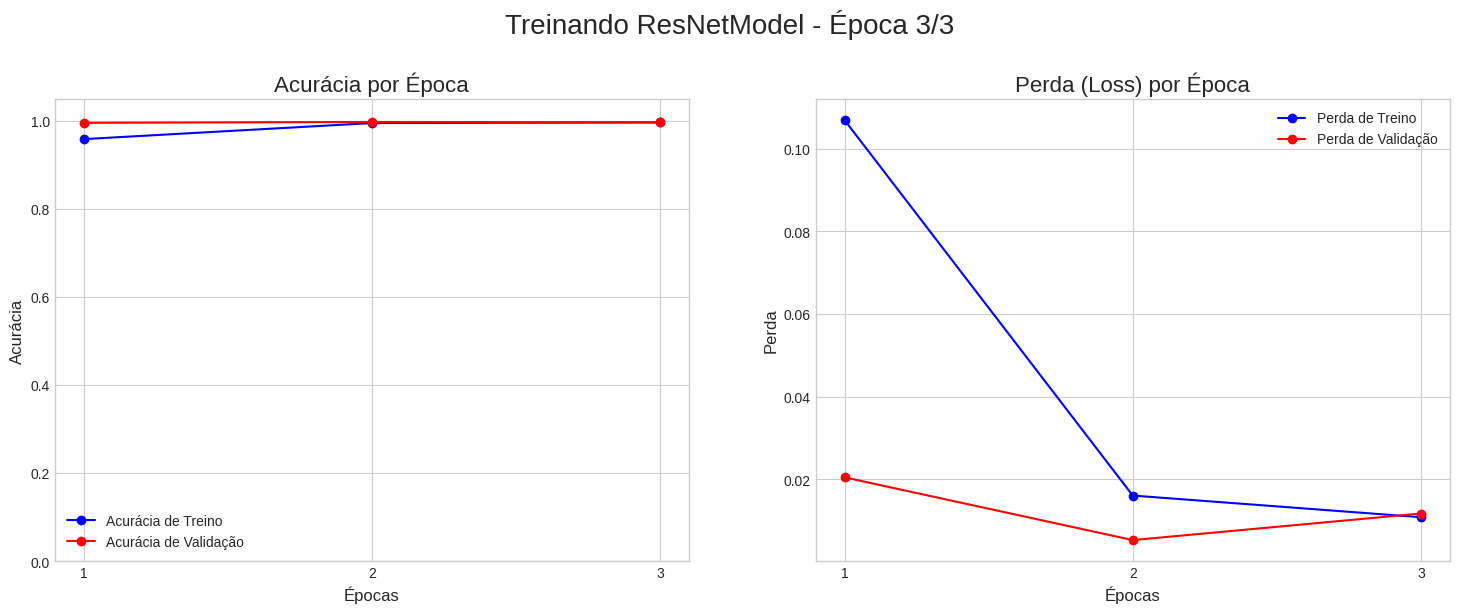

Epoch 3/3 | Train Loss: 0.0108, Acc: 0.9970 | Val Loss: 0.0117, Val Acc: 0.9970

Tempo total de treinamento para ResNetModel: 7551.59 segundos


In [ ]:
resnet_model = ResNetModel(num_classes_multi=NUM_CLASSES).to(device)
history_resnet = run_experiment_with_live_plot(resnet_model, "ResNetModel", MRI_train_loader, MRI_test_loader, device)

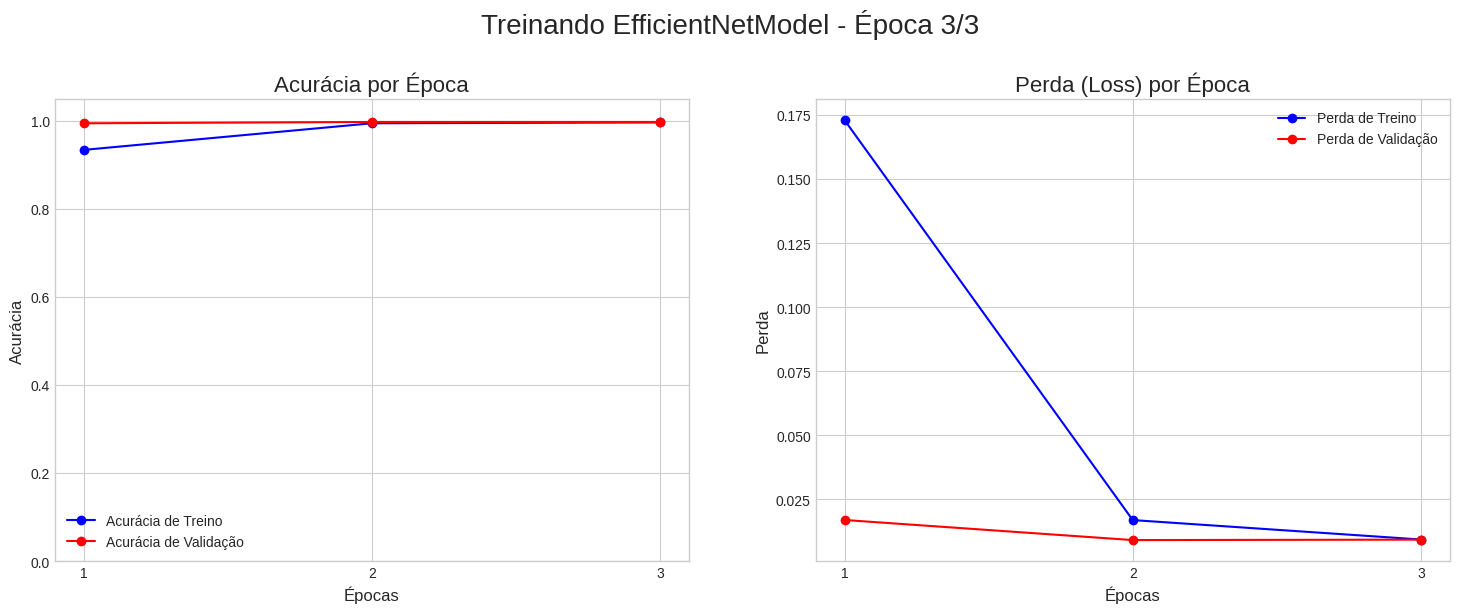

Epoch 3/3 | Train Loss: 0.0093, Acc: 0.9970 | Val Loss: 0.0093, Val Acc: 0.9980

Tempo total de treinamento para EfficientNetModel: 5925.54 segundos


In [ ]:
efficientnet_model = EfficientNetModel(num_classes_multi=NUM_CLASSES).to(device)
history_efficientnet = run_experiment_with_live_plot(efficientnet_model, "EfficientNetModel", MRI_train_loader, MRI_test_loader, device)

# Avaliação

In [ ]:
# Função de avaliação para modelos multi-tarefa
def generate_evaluation_metrics(model, dataloader, device, class_names):
    # Coloca o modelo em modo de avaliação
    model.eval()
    y_true = []
    y_pred = []

    # Desabilita o cálculo de gradientes para acelerar
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)

            # A saída do modelo agora é um dicionário
            output_dict = model(images)

            # Acessamos a saída específica da classificação multiclasse antes de usar torch.max
            # Esta é a chave que contém os logits para a nossa tarefa de interesse.
            multi_class_logits = output_dict["multi_class_classification"]
            _, predicted = torch.max(multi_class_logits, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())


    # Matriz de Confusão
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Previsão do Modelo', fontsize=12)
    plt.ylabel('Rótulo Verdadeiro', fontsize=12)
    plt.title(f'Matriz de Confusão Final - {model.__class__.__name__}', fontsize=16)
    plt.show()

    # Relatório de Classificação
    print(f"\n--- Relatório de Classificação Final para {model.__class__.__name__} ---\n")
    report = classification_report(y_true, y_pred, target_names=class_names)
    print(report)

Iniciando a avaliação final no conjunto de teste para o modelo ResNet...


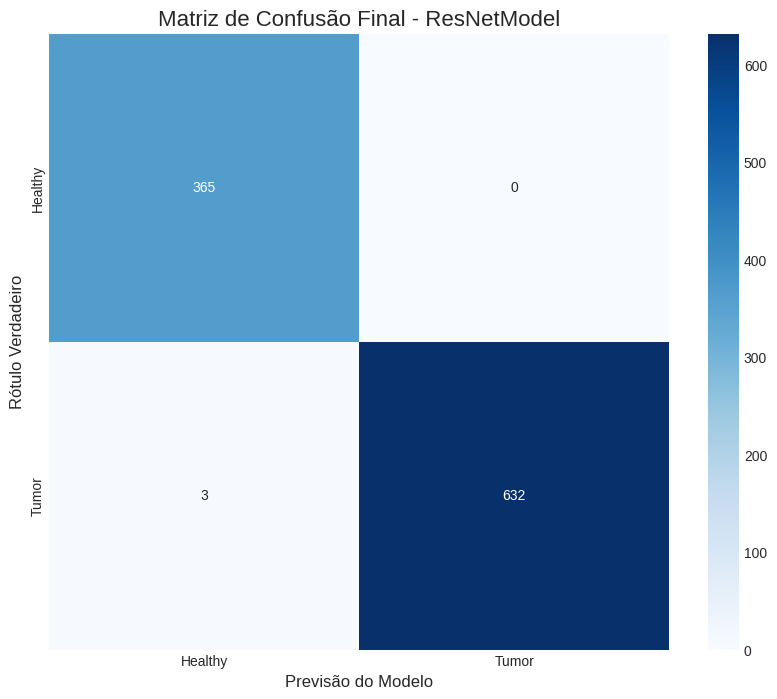


--- Relatório de Classificação Final para ResNetModel ---

              precision    recall  f1-score   support

     Healthy       0.99      1.00      1.00       365
       Tumor       1.00      1.00      1.00       635

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [ ]:
print("Iniciando a avaliação final no conjunto de teste para o modelo ResNet...")
generate_evaluation_metrics(resnet_model, MRI_test_loader, device, MRI.classes)

Iniciando a avaliação final no conjunto de teste para modelo EfficientNet...


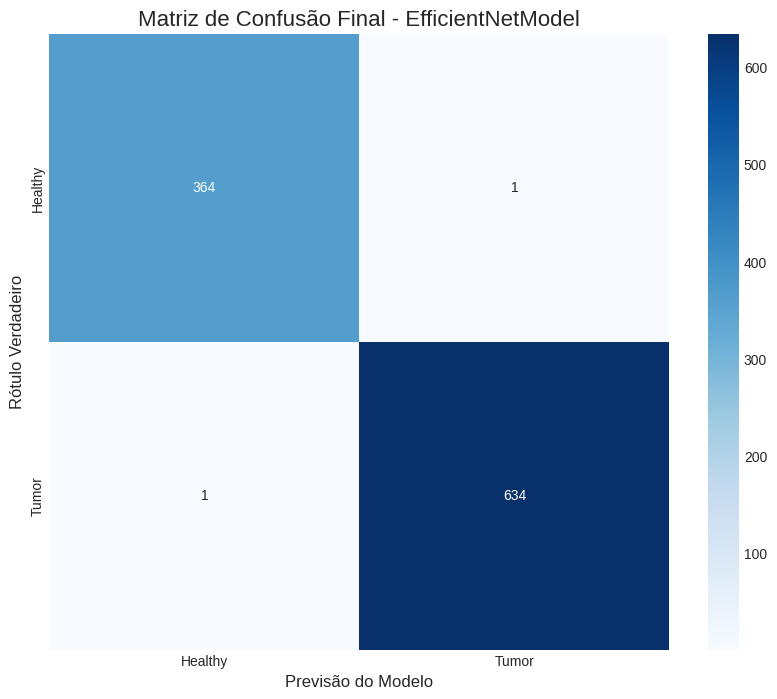


--- Relatório de Classificação Final para EfficientNetModel ---

              precision    recall  f1-score   support

     Healthy       1.00      1.00      1.00       365
       Tumor       1.00      1.00      1.00       635

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [ ]:
print("Iniciando a avaliação final no conjunto de teste para modelo EfficientNet...")
generate_evaluation_metrics(efficientnet_model, MRI_test_loader, device, MRI.classes)

In [ ]:
def visualize_predictions(model, dataloader, device, class_names, num_images=10):
    model.eval()
    # Pega um lote de imagens
    images, labels = next(iter(dataloader))
    images, labels = images.to(device), labels.to(device)

    # Pega as previsões
    # A saída é um dicionário
    output_dict = model(images)

    # Acessamos a saída correta do dicionário antes de aplicar torch.max
    multi_class_logits = output_dict["multi_class_classification"]
    _, preds = torch.max(multi_class_logits, 1)

    plt.figure(figsize=(15, 7))
    plt.suptitle("Inspeção Visual das Previsões", fontsize=20)

    for i in range(num_images):
        plt.subplot(2, 5, i + 1)

        # O tensor da imagem precisa ser movido para a CPU e reordenado para o formato do Matplotlib
        img = images[i].cpu().permute(1, 2, 0)

        # Define a cor do título: verde para acerto, vermelho para erro
        color = "green" if preds[i] == labels[i] else "red"

        plt.imshow(img)
        plt.title(f'Previsto: {class_names[preds[i]]}\nReal: {class_names[labels[i]]}', color=color)
        plt.axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

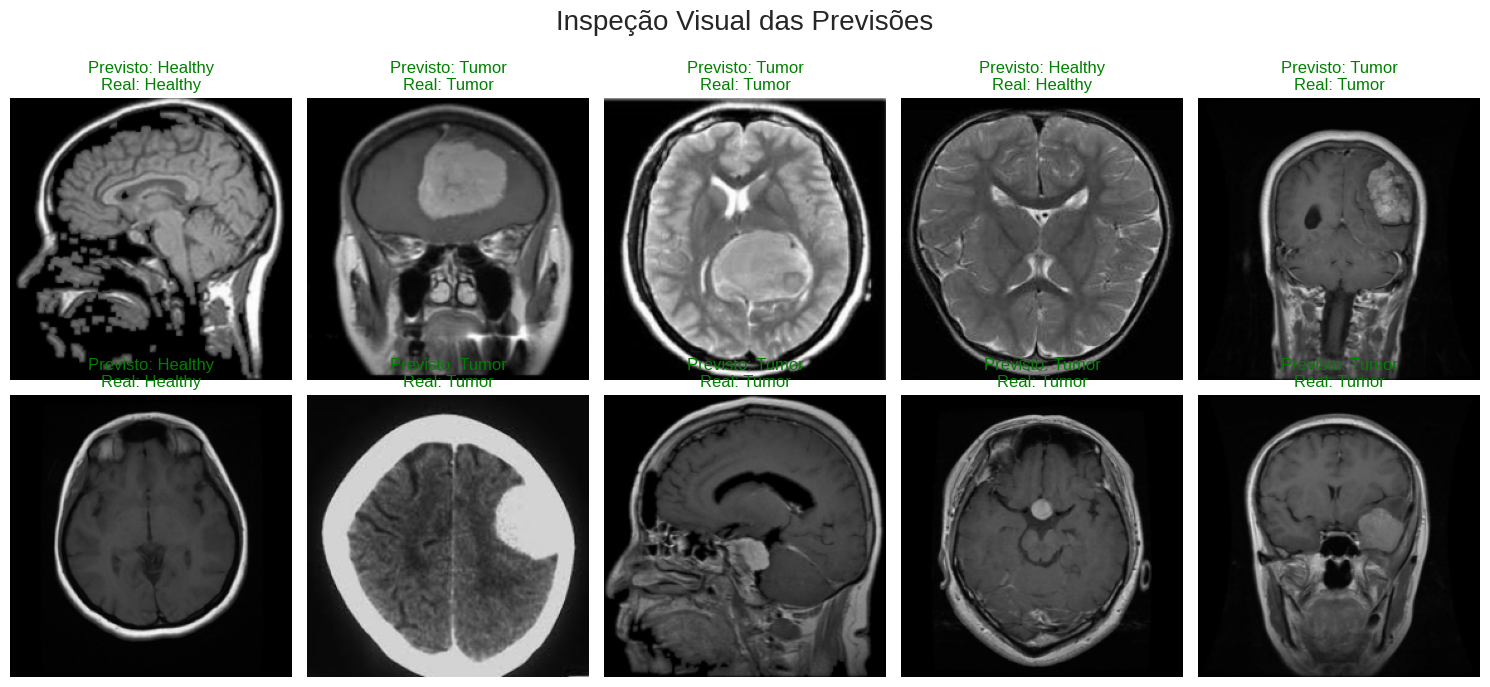

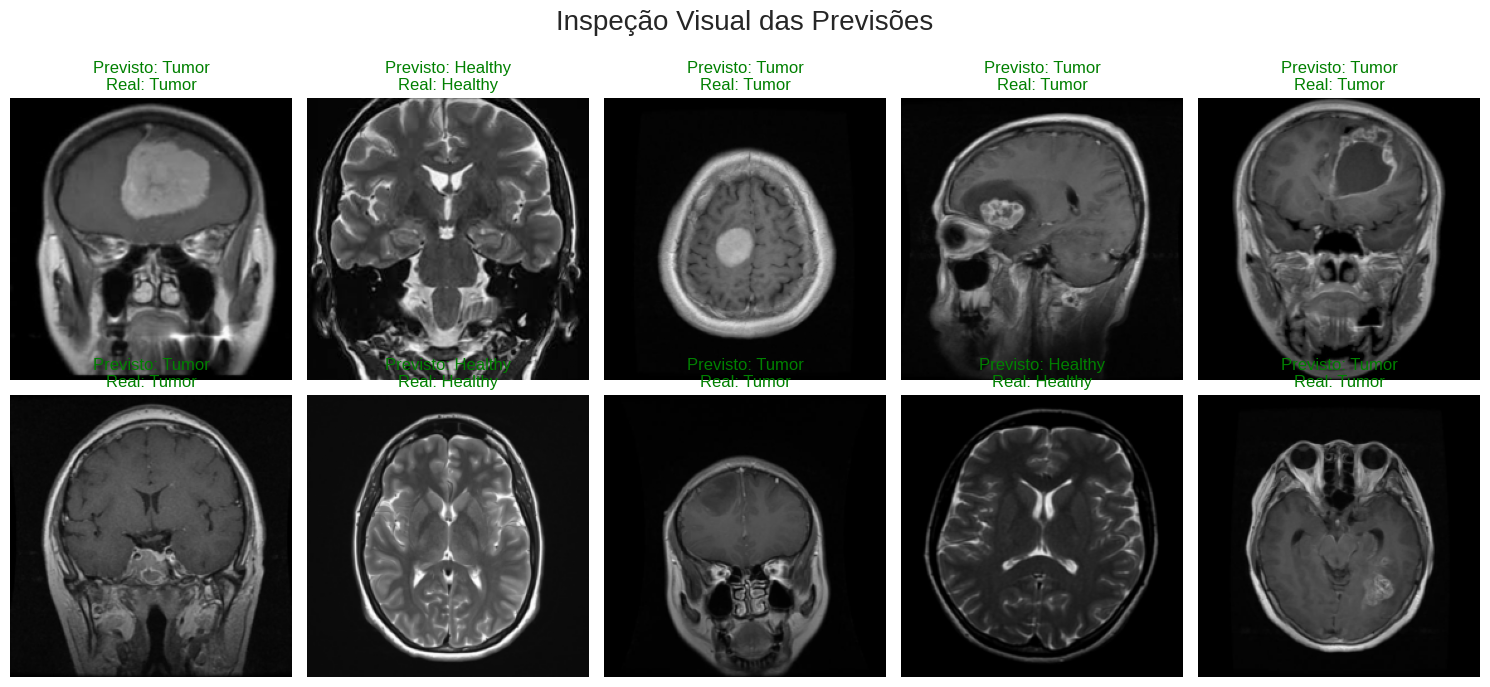

In [ ]:
visualize_predictions(resnet_model, MRI_test_loader, device, MRI.classes)
visualize_predictions(efficientnet_model, MRI_test_loader, device, MRI.classes)

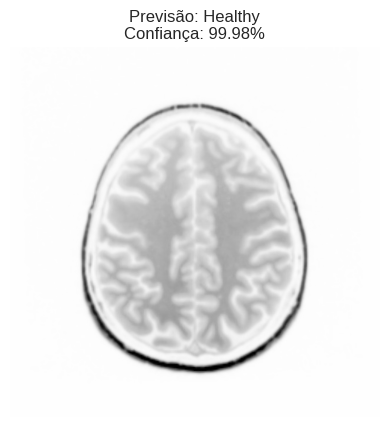

A imagem 'mri_healthy (1).jpeg' foi classificada como: 'Healthy' com 99.98% de confiança.


In [ ]:
def predict_single_image(model, image_path, transform, device, class_names):
    model.eval()

    # Carregar a imagem
    try:
        # Garante 3 canais de cor
        image = Image.open(image_path).convert("RGB")
    except FileNotFoundError:
        print(f"Erro: Arquivo não encontrado em '{image_path}'")
        # Retorna None para indicar falha
        return None, None

    # Aplicar as transformações
    image_tensor = transform(image)

    # Adicionar a dimensão de lote (batch dimension)
    image_tensor = image_tensor.unsqueeze(0)

    # Mover para o dispositivo
    image_tensor = image_tensor.to(device)

    with torch.no_grad():
        # Obter as previsões
        # A saída do modelo é um dicionário
        output_dict = model(image_tensor)

        # Acessamos o tensor de logits correto usando a chave de texto
        multi_class_logits = output_dict["multi_class_classification"]

        # Converter logits para probabilidades usando Softmax
        # Usamos multi_class_logits[0] para pegar o primeiro (e único) item do lote
        probabilities = torch.nn.functional.softmax(multi_class_logits[0], dim=0)

        # Obter a classe com maior probabilidade
        confidence, predicted_idx = torch.max(probabilities, 0)

        predicted_class = class_names[predicted_idx.item()]

    return predicted_class, confidence.item()


# Primeiro, vamos pegar um caminho de imagem de exemplo do nosso conjunto de teste
sample_image_path = MRI_test_dataset.dataset.samples[0][0]

# Chame a função de previsão
predicted_class, confidence = predict_single_image(resnet_model, sample_image_path, transform, device, MRI.classes)

# Mostra a imagem e o resultado
if predicted_class:
    img = Image.open(sample_image_path)
    plt.imshow(img)
    plt.title(f'Previsão: {predicted_class}\nConfiança: {confidence*100:.2f}%')
    plt.axis('off')
    plt.show()

    print(f"A imagem '{sample_image_path.split('/')[-1]}' foi classificada como: '{predicted_class}' com {confidence*100:.2f}% de confiança.")